<a href="https://colab.research.google.com/github/gourinj237/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('netflix_titles.csv')

# Data Cleaning

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [21]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [22]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [73]:
df = df.drop_duplicates()

In [23]:
df = df.dropna(subset=['type' , 'release_year', 'rating' , 'country' , 'duration'])
type_count = df['type'].value_counts()
type_count

,count
type,
Movie,5185
TV Show,147


# How many titles are Movies vs TV Shows?

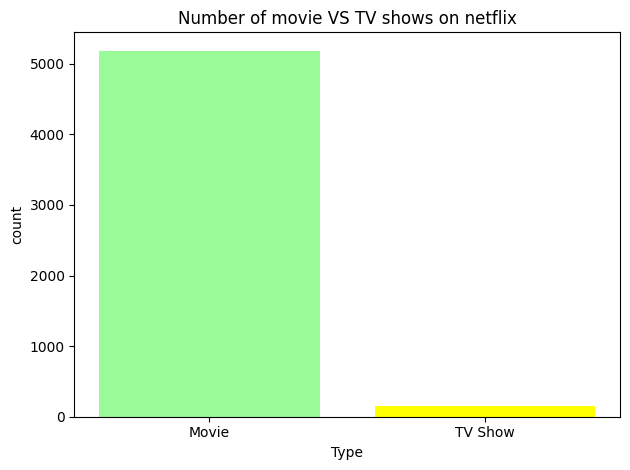

In [81]:
plt.bar(type_count.index, type_count.values , color =['palegreen', 'yellow'])
plt.title('Number of movie VS TV shows on netflix')
plt.xlabel('Type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('movie_vs_tvshow.png')
plt.show()

# Which is the most common rating?

In [24]:
rating_count = df['rating'].value_counts()

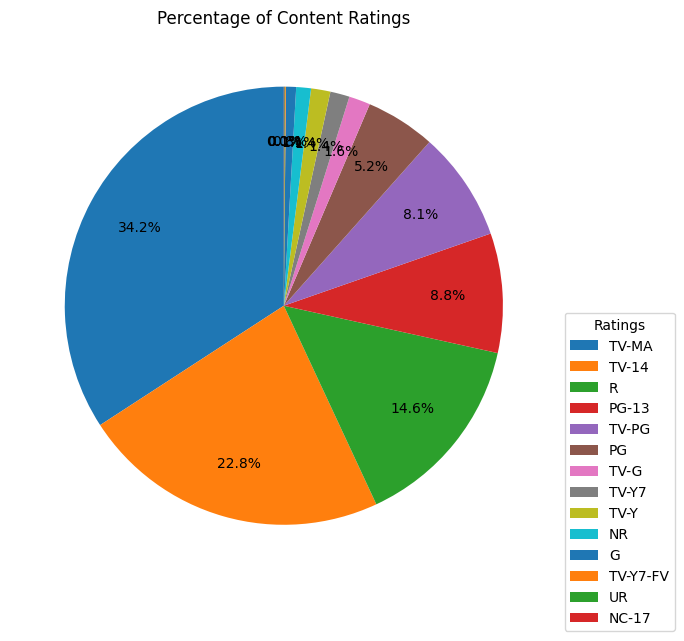

In [82]:
plt.figure(figsize=(8,6))
plt.pie(rating_count, autopct ='%1.1f%%' , startangle = 90, labeldistance=1.15,pctdistance=0.75)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.legend(rating_count.index, title="Ratings", bbox_to_anchor=(1, 0.5))
plt.savefig('content_ratings_pie.png')
plt.show()

# How has the number of Netflix titles released changed over the years?

In [31]:
release_counts = df['release_year'].value_counts().sort_index()

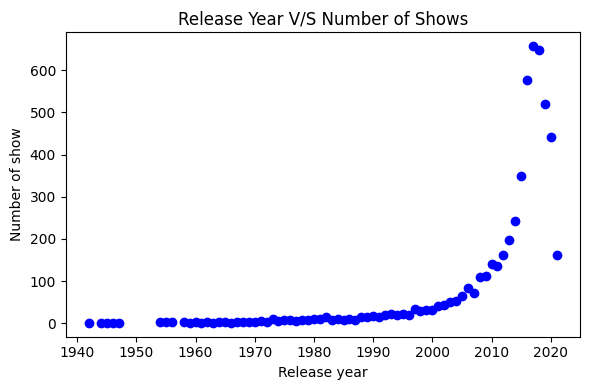

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(release_counts.index, release_counts.values, color='blue')
plt.title('Release Year V/S Number of Shows')
plt.xlabel('Release year')
plt.ylabel('Number of show')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

# Which are the top 10 countries with the highest number of Netflix titles?

In [54]:
country_count = df['country'].value_counts().head(10)

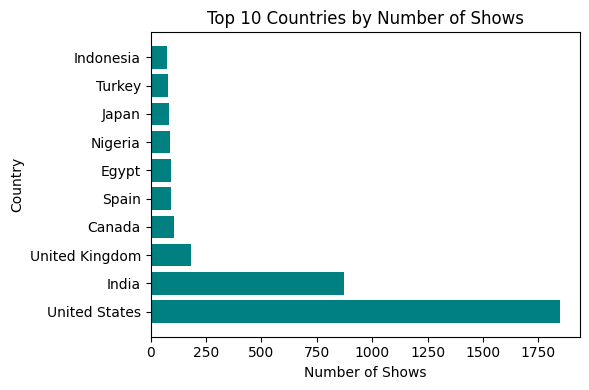

In [83]:
plt.figure(figsize=(6,4))
plt.barh(country_count.index, country_count.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

# What are the most frequent genres/categories?

In [61]:
genre_count=df['listed_in'].value_counts().head(20)

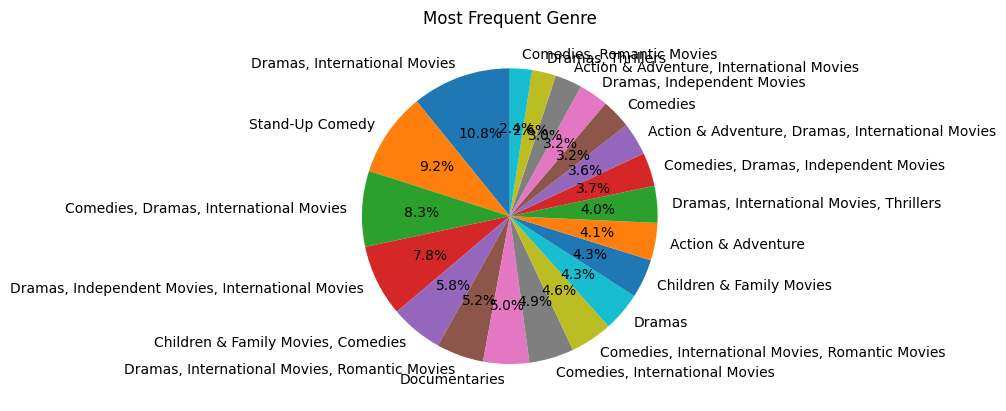

In [62]:
plt.pie(genre_count,labels=genre_count.index,autopct ='%1.1f%%' , startangle = 90)
plt.title('Most Frequent Genre')
plt.savefig('most_freq_genre.png')
plt.show()

# Who are the top 10 most frequently featured directors on Netflix, and how many titles have they directed?

In [65]:
dir_count=df['director'].value_counts().head(10)

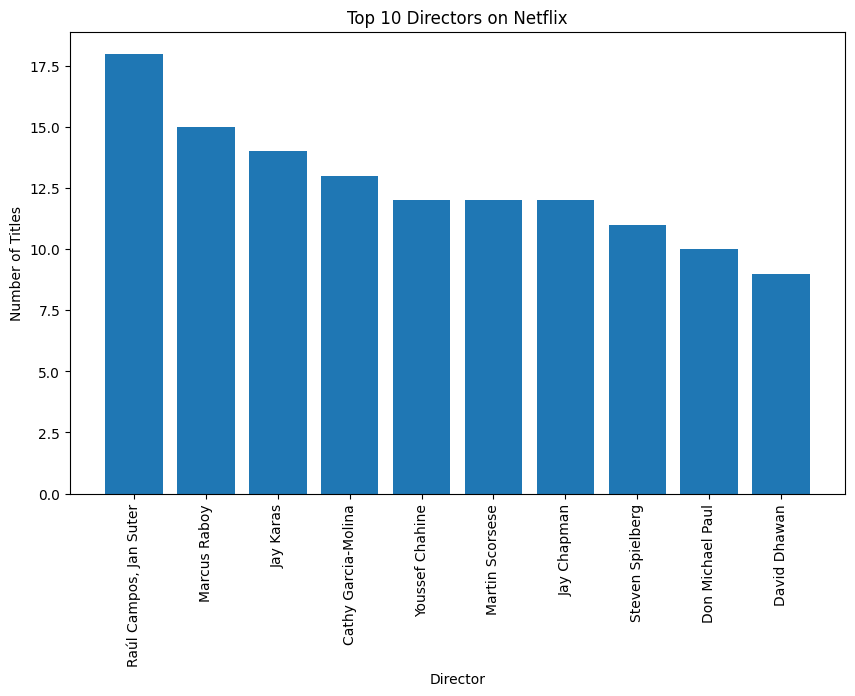

In [71]:
plt.figure(figsize=(10,6))
plt.bar(dir_count.index, dir_count.values)
plt.xticks(rotation=90)  # Rotate names vertically
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 10 Directors on Netflix')
plt.show()

# What’s the average duration of Movies vs TV Shows?

In [72]:
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['duration_num'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

avg_movie_duration = movies['duration_num'].mean()
avg_tvshow_seasons = tv_shows['duration_num'].mean()

print(f"📽️ Average Movie Duration: {avg_movie_duration:.1f} minutes")
print(f"📺 Average TV Show Length: {avg_tvshow_seasons:.1f} seasons")

📽️ Average Movie Duration: 102.7 minutes
📺 Average TV Show Length: 1.9 seasons


# Conclusion

In [ ]:
Q1. How many titles are Movies vs TV Shows?
Most of the content on Netflix consists of Movies (around 5,000 titles), whereas TV Shows are relatively fewer (less than 200 titles).

Q2. Which is the most common rating?
The most prevalent rating is TV-MA, accounting for about 34.2% of all titles, indicating a strong focus on mature audiences.

Q3. How has the number of Netflix titles released changed over the years?
The number of releases remained low before 2010, then sharply increased, peaking around 2018–2019. There was a noticeable drop following that period, likely due to the COVID-19 pandemic’s impact on production.

Q4. Which are the top 10 countries with the highest number of Netflix titles?
The United States leads by a significant margin, followed by India and the United Kingdom as other major contributors to Netflix’s content library.

Q5. What are the most frequent genres/categories?
The dominant genres are Dramas and International Movies, with Stand-up Comedy and Comedy Dramas also ranking highly.

Q6. Who are the top 10 most frequently featured directors on Netflix, and how many titles have they directed?
Raoul Campos, Jan Suter emerges as one of the most prolific directors, featuring multiple titles on the platform.

Q7. What’s the average duration of Movies vs TV Shows?
On average, Movies have a duration of about 102 minutes, while TV Shows typically span around 2 seasons.



